<a href="https://colab.research.google.com/github/seoy9/DALC_Scala/blob/main/DALC_Scala_7%EC%A3%BC_%EA%B3%BC%EC%A0%9C_%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 빅데이터 분류분석

## 7-1 빅데이터 분류 분석의 절차

### 1. 분류 분석의 개념
</br>

##### 1) 데이터의 특징과 레이블
[ __지도학습__ ]
+ 데이터의 특징과 레이블 사이의 관계 모델링

기온      | 습도     | 불쾌도
----------|----------|----------
20        | 60       | 쾌적
30        | 80       | 불쾌
30        | 70       | 불쾌
35        | 75       | ?

+ 연속적인 숫자가 아니라 등급으로 표현 = __이산적인 범주형 레이블__
  + 데이터에 따라 등급의 숫자는 달라질 수 있음
  + 연속적인 데이터일지라도 특정값을 기준으로 몇 개의 구간으로 구분하면 범주형 레이블로 취급
</br></br>

[ __분류 분석__ ]
+ 레이블을 범주, 클래스 등이 이산적인 데이터일 경우 데이터 세트의 특징 배열 데이터를 학습하여 어떤 레이블에 해당하는지 분류하는 모델을 찾는 기법
</br></br>

[ __이산적인 레이블 예측하기__ ]

![이산적인 레이블 예측](https://github.com/seoy9/DALC_Scala/blob/2ba7b6b0aefa9c9c811cdf2a32f8a1cd7bb49989/%EC%9D%B4%EC%82%B0%EC%A0%81%EC%9D%B8%20%EB%A0%88%EC%9D%B4%EB%B8%94%20%EC%98%88%EC%B8%A1.JPG?raw=true)
+ 그림으로 표현된 데이터 : 특징 배열이 2차원  
→ 각 데이터를 나타내는 표본의 특징 배열의 값을 2차원 좌표평면 위에 표시 가능
+ x축 : 기온 / y축 : 습도
+ 점의 색상 : 데이터의 레이블
+ 파란색 : 쾌적 / 빨간색 : 불쾌

→ 레이블이 없다고 가정, 기존에 조사한 데이터를 사용해서 새로운 데이터의 레이블을 결정하는 모델을 만들 수 있다면?  
→ 훨씬 경제적이고 편리 = __분류 분석의 개념__
</br></br>

##### 2) 분류
[ __모델과 모수__ ]

![모델과 모수](https://github.com/seoy9/DALC_Scala/blob/a82dae8c73811aa0563b8c225335c9fb2f881ebc/%EB%AA%A8%EB%8D%B8%EA%B3%BC%20%EB%AA%A8%EC%88%98.JPG?raw=true)

+ 하나의 직선이 레이블의 클래스를 구분
+ 분류 모델의 정확도는 직선이 어느 위치, 어느 방향에서 그려지는가에 따라 달라짐
+ 모델의 모수 : 직선의 위치와 방향을 설명할 수 있는 특정 숫자
+ 모수를 찾는 과정 : 적합(fitting)
</br></br>

[ __모델 적용__ ]
+ 학습한 모델을 이용하여 레이블이 없는 새 데이터를 분류하는 것

![모델 적용](https://github.com/seoy9/DALC_Scala/blob/43dcad477b151de887f347e77cba1f9180f4c562/%EB%AA%A8%EB%8D%B8%20%EC%A0%81%EC%9A%A9.JPG?raw=true)

+ 레이블이 없는 데이터가 주워졌을 때, 모델에서 학습한 직선을 그린 다음 데이터들을 빨간색 또는 파란색 레이블로 분류  
→ 예측(predicition)
+ 더 큰 차원, 더 큰 데이터 세트로 확장 가능
+ 분류 분석은 머신러닝에서 유용한 도구 중 하나
</br></br>

### 2. 분류 분석의 절차
</br>

##### 1) Scikit Learn API 사용 단계
1. Scikit Learn API에서 적절한 추정기 클래스를 임포트 해서 사용하고자 하는 모델을 선택
2. 클래스로부터 인스턴스를 생성하고 초모수(Hyper-parameter)를 설정
3. 데이터를 특징 배열과 대상 배열로 준비
4. 모델 인스턴스의 fit() 메소드를 호출해서 데이터를 학습
</br></br>

##### 2) 분류 분석의 예제
[ __붓꽃 데이터__ ]


In [1]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


+ 붓꽃의 외형 데이터로부터 붓꽃의 품종을 예측하는 모델  
</br></br>

[ __모델 클래스 선택__ ]

In [2]:
from sklearn.naive_bayes import GaussianNB

+ GaussianNB : 가우스 나이브 베이즈 생성 모델
  + 처리 속도가 빠르고 초모수를 선택할 필요가 없기 때문에 기본 분류기로 사용하기에 적합
</br></br>

[ __모델 인스턴스화__ ]

In [3]:
model = GaussianNB() # 초모수를 선택할 필요가 없기 때문에 괄호 안에 인수를 추가하지 않음

[ __데이터 분할__ ]

In [4]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, test_size=0.25, random_state=1)

NameError: ignored

[ __데이터 모델 적합__ ]

In [ ]:
model.fit(Xtrain, ytrain) # (특징 행렬, 대산 배열)

[ __모델 적용__ ]

In [ ]:
y_model = model.predict(Xtest)

[ __모델 정확도 확인__ ]

In [ ]:
from sklearn.metrics import accuracy_score # 두 배열 사이에 서로 일치하는 요소의 비율 계산
accuracy_score(ytest, y_model) # (붓꽃의 품종, 예측한 레이블)

## 7-2 초모수와 모델 검증 방법

### 1. 초모수와 모델 검증
</br>

##### 1) 지도 학습 단계
+ 지도 학습 = 회귀 분석 + 분류 분석
+ 초모수 : 학습을 통해 추정되지 않는 모델 모수
+ 성공적인 지도학습은 정확도가 높은 모델을 찾아내는 것
</br></br>

##### 2) 잘못된 방식의 모델 검증
[ __모델 불러오기__ ]

In [5]:
from sklearn.neighbors import KNeighborsClassifier

+ 모델과 초모수 선택
+ 훈련 데이터로 모델 훈련
+ 계산된 예측값 vs 실제값 비교

→ 견고한 모델 평가를 위해 검정 표본과 교차 검증을 사용하는 법은?
</br>

[ __K-최근접 이웃 분류기 모델__ ]
+ 알려지지 않은 점의 레이블은 훈련 데이터 중 그와 가장 가까운 이웃 K개의 점의 레이블과 같음
</br></br>

[ __인스턴스 생성 및 초모수 선택__ ]

In [6]:
model = KNeighborsClassifier(n_neighbors=1)

+ 레이블이 없는 데이터가 있을 때, 그 데이터의 레이블은 가장 가까이 있는 점과 레이블이 동일
</br></br>

[ __데이터 준비__ ]

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

[ __모델 적합__ ]

In [9]:
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

[ __모델 평가__ ]

In [10]:
from sklearn.metrics import accuracy_score # accuracy_score : 인수로 주어진 두 배열의 각 요소를 비교하여 일치하는 비율을 계산하는 함수
y_model = model.predict(X)
accuracy_score(y, y_model)

1.0

+ 정확도 1.0 → 모델을 사용해 100% 모든 점이 올바른 레이블을 가지게 됨
+ 이 모델은 정말 언제나 참일까? → __NO__
+ 모델을 훈련한 데이터와 동일한 데이터로 모델을 검증하였다  
→ 잘못된 방식의 모델 검증
+ 머신 러닝의 본래 목적에 맞도록 올바른 방식의 검증 방식이 필요
</br></br>

[ __데이터 분할__ ]

In [11]:
from sklearn.model_selection import train_test_split

X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5) # 전체 데이터 중에서 학습 50%, 검증에 50%

[ __모델 적합 및 평가__ ]

In [12]:
model.fit(X1, y1)

y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

+ K-최근접 이웃 분류기는 이 검증데이터에 대해 약 90%의 정확도를 가짐
</br></br>

### 1. 교차 검증 방법
</br>

##### 1) 2겹 교차 검증
+ 데이터의 양이 충분하지 않을 때 사용할 수 있는 방법 = __교차 검증 방법(Cross Validation)
+ 데이터를 절반씩 나누어 절반은 훈련데이터, 나머지 절반은 검증데이터로 사용
+ 서로 역할을 바꾸어 훈련과 검증을 반복 실시하는 것
</br></br>

[ __결과__ ]

In [13]:
y1_model = model.fit(X1, y1).predict(X2)
y2_model = model.fit(X2, y2).predict(X1)
score1 = accuracy_score(y1, y1_model)
score2 = accuracy_score(y2, y2_model)
score = (score1 + score2) / 2
print(score)

0.36


+ 두 개의 정확도 값의 평균을 구해 최종 정확도 계산
</br></br>

##### 2) 5겹 교차 검증
+ 5번 검증 실시
+ 전체 데이터의 1/5을 검증 데이터, 나머지인 4/5를 훈련 데이터로 사용
</br></br>

[ __결과__ ]

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5).mean()

0.96

##### 3) 단일 관측지 제거 방식
+ 데이터의 수가 극도로 적은 경우
+ 1개의 데이터만을 검증 데이터로 사용
+ 이 경우 전체 데이터의 수만큼 교차 검증을 반복

In [15]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores.mean() # 평균 계산을 통해 정확도 추정

0.96

+ 데이터 수가 충분하지 않을 때 사용하면 효과적

## 7-3 분류 심화: 나이브 베이즈 기법

### 1. 베이즈 정리(Bayes' theorem)
</br>

##### 1) 개요
[ __베이브 분류 개념__ ]
+ 관측된 특징(features)이 주어졌을 때 레이블(label)의 확률을 계산  
$P(L\features)$
+ 베이즈 정리를 이용하여 다음과 같이 표현됨  
$P(L\features) = \frac{P(features, L)}{P(features)} = \frac{P(features\L)P(L)}{P(features)}$
+ 레이블이 $L_1, L_2$ 두 개인 경우  
$P(L_{1}\features) = \frac{P(features\L_{1})P(L_{1})}{P(features)}, P(L_{2}\features) = \frac{P(features\L_{2})P(L_{2})}{P(features)}$
+ 확률 값이 큰 레이블을 선택  
$P(L_{1}\features) > P(L_{2}\features)$ 이면 $L_{1}$  
$P(L_{1}\features) ≤ P(L_{2}\features)$ 이면 $L_{2}$
</br></br>

[ __생성 모델(generative model)__ ]
+ 각 레이블에 대한 특징 데이터의 확률값을 계산할 수 있는 모델
+ 생성 모델의 형태에 대한 가장 간단한 가정을 사용하여 단순하게 형성 가능
+ 레이블의 사후 확률 계산 방법  
$P(L_{1}\features) = \frac{P(features\L_{1})P(L_{1})}{P(features)}, P(L_{2}\features) = \frac{P(features\L_{2})P(L_{2})}{P(features)}$
+ 생성 모델 가정  
$P(features\L)~N(μ, σ^2)$
</br></br>

##### 2) 가우스 나이브 베이즈

[ __분석 환경 설정__ ]


In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

[ __데이터 준비__ ]

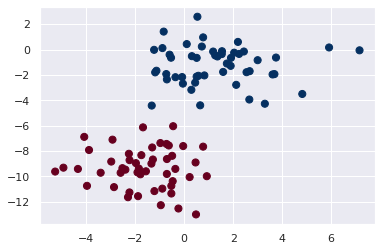

In [17]:
from sklearn.datasets import make_blobs # 동방성 가우시안 정규분포를 이용하여 가상 데이터 생성
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

[ __데이터 시각화__ ]

![데이터 시각화](https://github.com/seoy9/DALC_Scala/blob/465c43faa539fd5ed8218245062aa87921f26ad4/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%8B%9C%EA%B0%81%ED%99%94.JPG?raw=true)
+ 빨간 레이블 데이터 : 왼쪽 하단
+ 파란 레이블 데이터 : 오른쪽 상단
</br></br>

[ __가우시안 생성 모델__ ]
+ 전체 : 차원 사이에 공분산이 없는 가우스 분포를 따름
+ 이 모델은 단순히 각 레이블 내 점의 평균과 표준 편차를 구하여 적합할 수 있음
![가우시안 생성 모델](https://github.com/seoy9/DALC_Scala/blob/117f0cefbbe1228ff2d98bf21effa868727265f2/%EA%B0%80%EC%9A%B0%EC%8B%9C%EC%95%88%20%EC%83%9D%EC%84%B1%20%EB%AA%A8%EB%8D%B8.JPG?raw=true)
+ 각 색상의 타원은 타원의 중심으로 갈수록 확률이 더 커지는 각 레이즐에 대한 가우스 생성 모델을 나타냄
</br></br>

[ __모델 인스턴스 생성__ ]

In [18]:
model = GaussianNB()

[ __모델 적합하기__ ]

In [19]:
model.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

[ __레이블 예측__ ]

In [20]:
rng = np.random.RandomState(0)
Xnew = [-6, 14] + [14, 18] * rng.rand(2000, 2) # 0~1 사이 난수 생성하고 각 차원으로 14와 18을 곱함, 각 차원에 -6과 -14를 더함
# 결과적으로 데이터 세트의 점들은 첫 번재 차원의 값은 -6과 8사이에서 변동하고, 두 번째 차원의 값들은 -14에서 4사이에서 변동
# 생성된 데이터의 수 2000
ynew = model.predict(Xnew)

[ __예측값 시각화__ ]

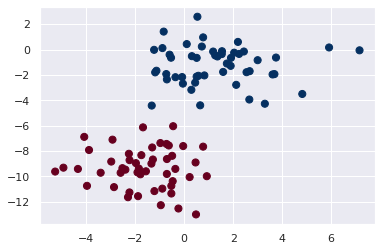

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=10, cmap='RdBu', alpha=0.2)
plt.axis(lim);

[ __시각화 결과__ ]

![시각화 결과](https://github.com/seoy9/DALC_Scala/blob/f7c0b3be9a22e71bead260ba4601575ffc9602f7/%EC%8B%9C%EA%B0%81%ED%99%94%20%EA%B2%B0%EA%B3%BC.JPG?raw=true)
+ 흩어져 있는 점의 색을 자세히 보면 색의 경계가 보임
+ 모델에서는 이 경계를 기준으로 레이블을 구분
</br></br>

[ __확률 표현의 장점__ ]


In [23]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

+ 분류 결과가 명확한 점과 애매한 점을 구분할 수 있음